<img src="imgs/IISc_Master_Seal_Black_Transparent.png" height="120px" width="120px" align="right" />

<img src="imgs/logoGESS.jpg" height="120px" width="120px" align="right" />

<font face="Calibri">
<font size="7"> <b> PySHBundle Tutorials </b> </font>
<br> 
<font size="5"> <b> Tutorial 3: Visualizations with PySHBundle<font color='rgba(200,0,0,0.2)'>  </font> </b> </font>
<br> <br>
    
<font size="3"> <b> by: Abhishek Mhamane, IIT Kanpur</b> 
<font size="2">  <br>
<font> <b>Date: </b> August 27, 2023 </font>
</font>


In [1]:
from tqdm import trange
from datetime import datetime
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import xarray as xr
import pyshbundle

Initializing PySHbundle v0.0.1


ImportError: cannot import name 'gaussian' from 'pyshbundle.gaussian' (/media/abhishek/DATA/projects/pysh_test/lib/python3.10/site-packages/pyshbundle/gaussian.py)

In [ ]:
import pyshbundle.reader_replacer_jpl
import pyshbundle.reader_replacer_csr
import pyshbundle.reader_replacer_itsg

from pyshbundle import gshs, plm, sc2cs
from pyshbundle.clm2sc import clm2sc_new
from pyshbundle.clm2cs import clm2cs_new

In [3]:
from pyshbundle.new_io import read_jpl, read_csr, read_tn13, read_tn14, extract_C10_11_replcmnt_coeff, cklm2sc_new
from pyshbundle.new_io import extract_C20_replcmnt_coeff, extract_C30_replcmnt_coeff, replace_zonal_coeff, find_date_in_replacemnt_file
from pyshbundle.new_io import read_itsg

In [4]:
from pyshbundle.visualisation_utils import sc_triplot, cs_sqplot, ylm, ylm_plot, mapfield, polar_plot, gshs_prepare

In [7]:
from pyshbundle import gshs

## Load Data

In [6]:
tn14_path_itsg = '/media/abhishek/DATA/trial/my_fork/pyshbundle/pyshbundle/data/ITSG_TN_files/TN-14_C30_C20_SLR_GSFC.txt'
tn_13_path_itsg = '/media/abhishek/DATA/trial/my_fork/pyshbundle/pyshbundle/data/ITSG_TN_files/TN-13_GEOC_CSR_RL06.1.txt'
itsg_folder = '/media/abhishek/DATA/trial/my_fork/pyshbundle/sample_input_data/ITSG_input'
itsg_file = '/media/abhishek/DATA/trial/my_fork/pyshbundle/sample_input_data/ITSG_input/ITSG-Grace2018_n96_2004-03.gfc'

In [7]:
data_itsg_mat= np.ndarray((4753, 6))
header = read_itsg(itsg_file)[0]
data_itsg_mat = read_itsg(itsg_file)[1]
dates_itsg = read_itsg(itsg_file)[2]

In [8]:
scmat_itsg, devscmat_itsg = clm2sc_new(data_itsg_mat, lmax=96, sigma_flag=True)

In [9]:
# Read replacemnt file
data_tn13_itsg = read_tn13(tn_13_path_itsg)
data_tn14_itsg = read_tn14(tn14_path_itsg)

In [10]:
replaced_data_mat = replace_zonal_coeff(data_itsg_mat, 'itsg', 96, data_tn13_itsg, data_tn14_itsg, dates_itsg, epoch_end=None)

Data Date - 2004-03-01, replacemnt date(tn-13) = 2004-03-01
Data Date - 2004-03-01, replacemnt date(tn-13) = 2004-03-01
[1.0000000e+00 0.0000000e+00 2.8881607e-10 0.0000000e+00 4.4585000e-11
 0.0000000e+00] [1.00000000e+00 1.00000000e+00 8.35305298e-11 7.45804459e-12
 4.52960000e-11 5.07240000e-11]
Data Date - 2004-03-01, replacemnt date (tn-14)_ = 2004-03-01
Data Date - 2004-03-01, replacemnt date (tn-14)_ = 2004-03-01


In [11]:
rep_sc, rep_dev = clm2sc_new(replaced_data_mat, lmax=96, sigma_flag=True)

# Visualise data

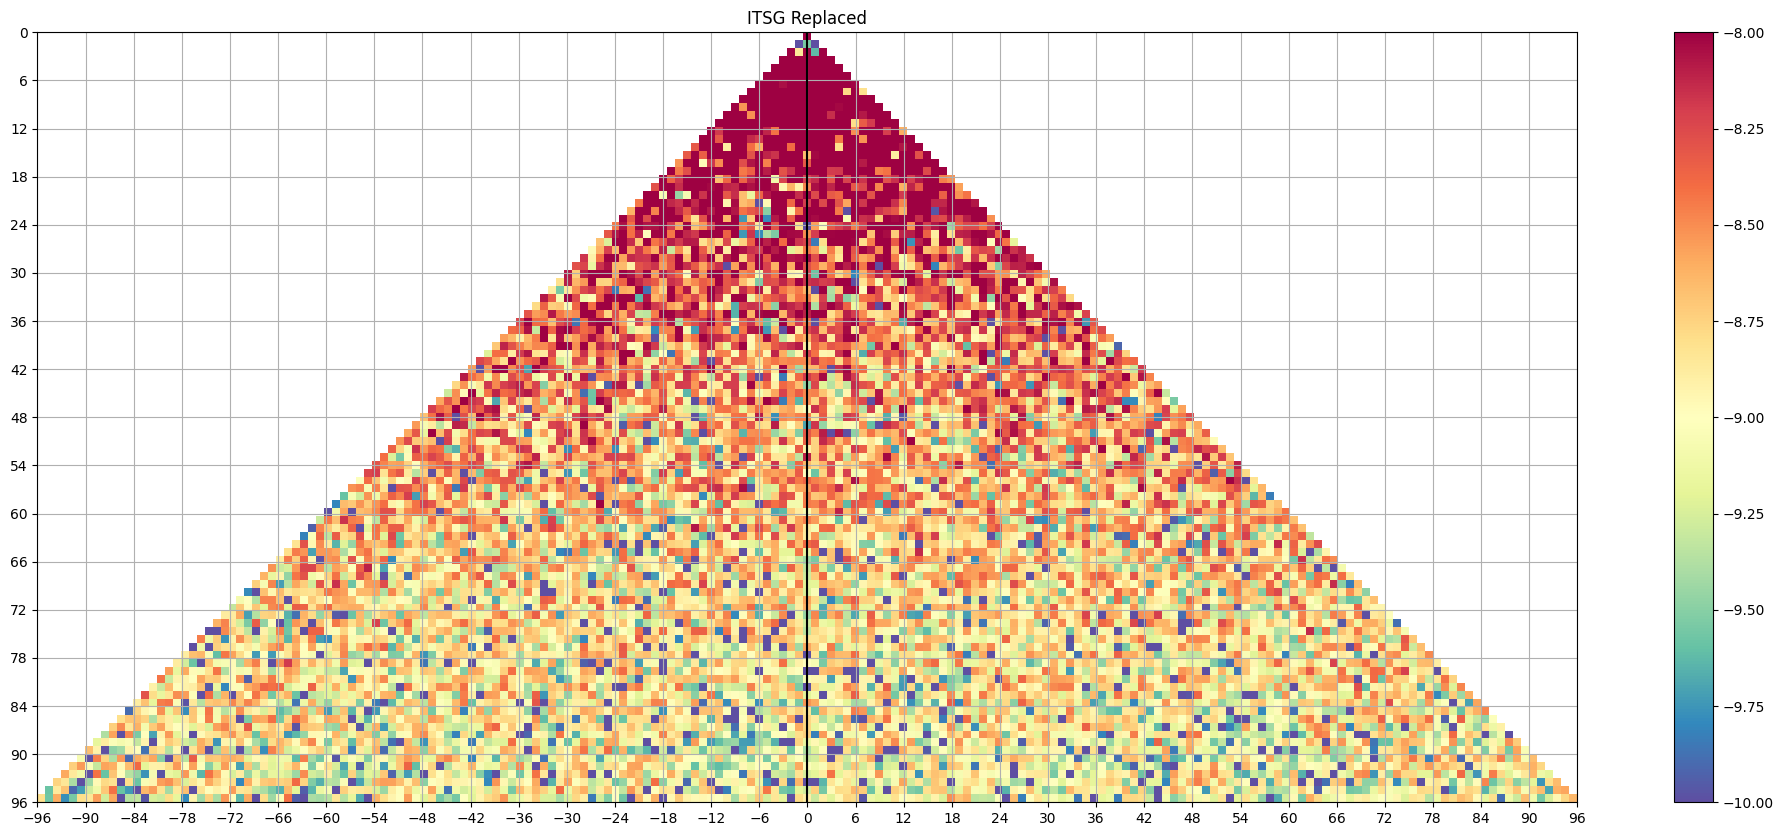

In [12]:
handle = sc_triplot(scmat=rep_sc, lmax=96, title="ITSG Replaced", vmin=-10, vmax=-8)

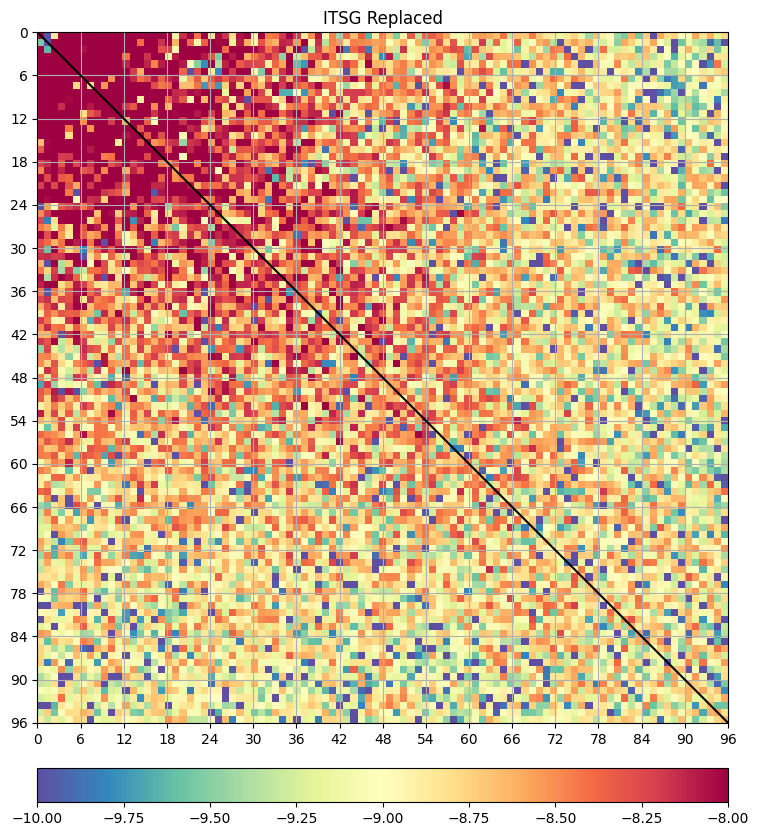

In [28]:
rep_cs = sc2cs(rep_sc)
handle2 = cs_sqplot(csmat=rep_cs, lmax=96, title="ITSG Replaced", vmin=-10, vmax=-8)

# Long Term Gravity Field

In [14]:
from pyshbundle.normalklm import normalklm
from pyshbundle.visualisation_utils import gshs_prepare
# load long term mean
long_mean_itsg = '/media/abhishek/DATA/pyshbundle/pyshbundle/data/long_mean/SH_long_mean_itsg.npy'
SH_long_mean_itsg = np.load(long_mean_itsg)


normal_cs = normalklm(lmax=96, typ='wgs84')

# convert the format 
normal_sc = pyshbundle.cs2sc.cs2sc(normal_cs)


In [17]:
# 
W = pyshbundle.gaussian(L=96, cap=500)

In [27]:
#basic computation
lngtrm_grav_field = gshs_prepare(lmax=96, gs=0.20, quant='gravity', grd='cell', h=0, jflag=0, sc_coeff=SH_long_mean_itsg)

TypeError: 'module' object is not callable

In [19]:
# Visualization for long term gravity field
mapfield(field=lngtrm_grav_field, img_extent=(-180, 180, -90, 90), title="Long Term Field", colorbar_bounds=None)

NameError: name 'lngtrm_grav_field' is not defined

# Normal Gravity Field 

In [20]:
#basic computation
normal_field = gshs_prepare(lmax=96, gs=0.20, quant='gravity', grd='cell', h=0, jflag=0, sc_coeff=normal_sc)

TypeError: 'module' object is not callable

In [21]:
mapfield(field=normal_field, img_extent=(-180, 180, -90, 90), title="Normal Gravity Field - WGS84 Ellipsoid", colorbar_bounds=None)

NameError: name 'normal_field' is not defined

# Temporal Gravity Field

In [22]:
temp_grav_field  = gshs_prepare(lmax=96, gs=0.20, quant='gravity', grd='cell', h=0, jflag=0, sc_coeff=rep_sc)

TypeError: 'module' object is not callable

In [23]:
mapfield(field=temp_grav_field, img_extent=(-180, 180, -90, 90), title="Temporal Gravity Field", colorbar_bounds=None)

NameError: name 'temp_grav_field' is not defined

# Gravity Anomalies

In [24]:
# compute the gravity anomalies and compute the field
anom_sc = rep_sc-SH_long_mean_itsg
grav_anom_field = gshs_prepare(lmax=96, gs=0.20, quant='gravity', grd='cell', h=0, jflag=0, sc_coeff=anom_sc)

TypeError: 'module' object is not callable

In [25]:
mapfield(field=grav_anom_field, img_extent=(-180, 180, -90, 90), title="Gravity Anomalies with Vertical Stripe Noise", colorbar_bounds=None)

NameError: name 'grav_anom_field' is not defined